In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
file_path = "gym_membership_prediction_with_professional_status.csv"
df = pd.read_csv(file_path)

print("First rows of the DataFrame:")
print(df.head())

print("\nSize of the DataFrame (rows, columns):")
print(df.shape)

print("\nNumber of columns:")
print(df.shape[1])

print("\nColumn names:")
print(df.columns.tolist())

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nNumber of unique values in each column:")
print(df.nunique())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

print("\nGeneral information about the DataFrame:")
df.info()

First rows of the DataFrame:
   User ID  Age  Gender  Annual Income Membership Type  Membership Duration  \
0        1   62   Other         135305         Premium                   46   
1        2   65    Male          59056           Basic                   26   
2        3   18    Male          63857           Basic                   46   
3        4   21    Male         135072           Basic                   54   
4        5   21  Female          59344           Basic                   36   

   Frequency of Visit Preferred Time Previous Membership Marital Status  \
0                   2      Afternoon                 Yes        Married   
1                   6      Afternoon                 Yes         Single   
2                   2      Afternoon                  No        Married   
3                   1        Evening                  No        Married   
4                   5        Morning                 Yes         Single   

   Location Promotion Response Health Conditi

In [31]:
#Sanity Checks

print("\nData types of each column:")
print(df.dtypes)

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nYoungest age:", df["Age"].min())
print("Oldest age:", df["Age"].max())

print("\nCheck for unexpected categories:")
for column in df.columns:
    print(f"Unique values in {column} column: {df[column].unique()}")

print("\nNumber of unique user IDs:")
print(df["User ID"].nunique())



Data types of each column:
User ID                   int64
Age                       int64
Gender                   object
Annual Income             int64
Membership Type          object
Membership Duration       int64
Frequency of Visit        int64
Preferred Time           object
Previous Membership      object
Marital Status           object
Location                 object
Promotion Response       object
Health Condition         object
Membership Prediction    object
Professional             object
Professional Status      object
dtype: object

Missing values in each column:
User ID                  0
Age                      0
Gender                   0
Annual Income            0
Membership Type          0
Membership Duration      0
Frequency of Visit       0
Preferred Time           0
Previous Membership      0
Marital Status           0
Location                 0
Promotion Response       0
Health Condition         0
Membership Prediction    0
Professional             0
Professio

count    4000.000000
mean       43.633000
std        15.182669
min        18.000000
25%        30.000000
50%        44.000000
75%        57.000000
max        69.000000
Name: Age, dtype: float64


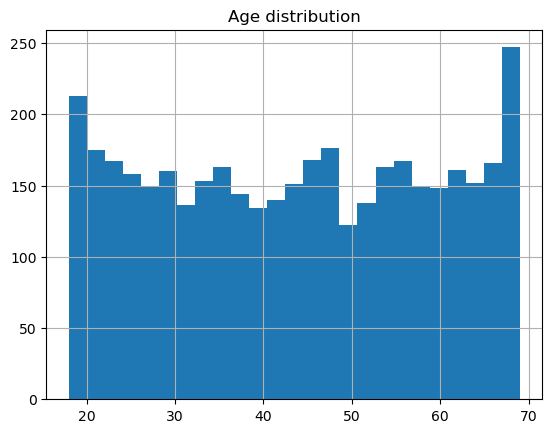

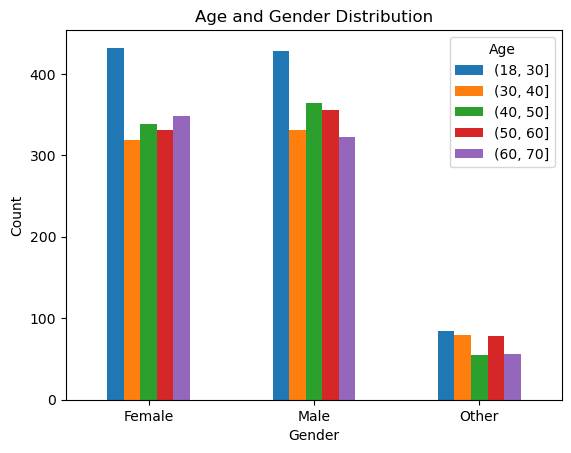

In [77]:
#Age analysis

print(df["Age"].describe())

#Age distribution
df["Age"].hist(bins=25)
plt.title("Age distribution")
plt.show()

#Age and gender distribution
age_bins = pd.cut(df["Age"], bins=[18, 30, 40, 50, 60, 70])
age_gender_counts = df.groupby(["Gender", age_bins]).size().unstack()

age_gender_counts.plot(kind="bar", stacked=False)
plt.title("Age and Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

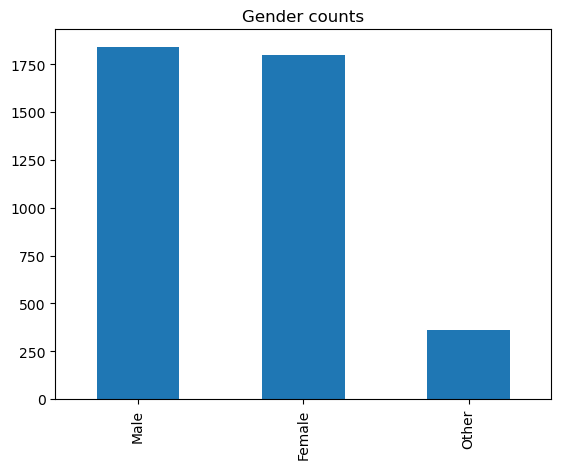

In [62]:
#Gender analysis

df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender counts")
plt.show()

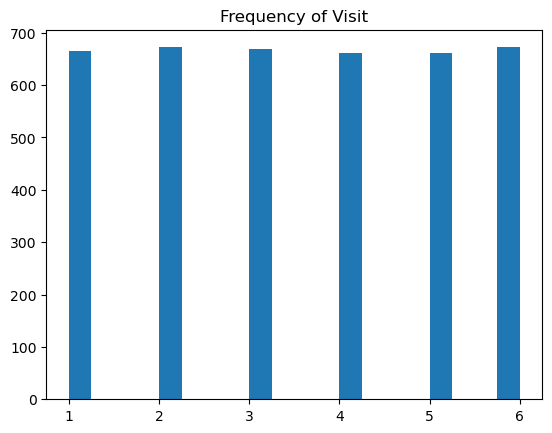

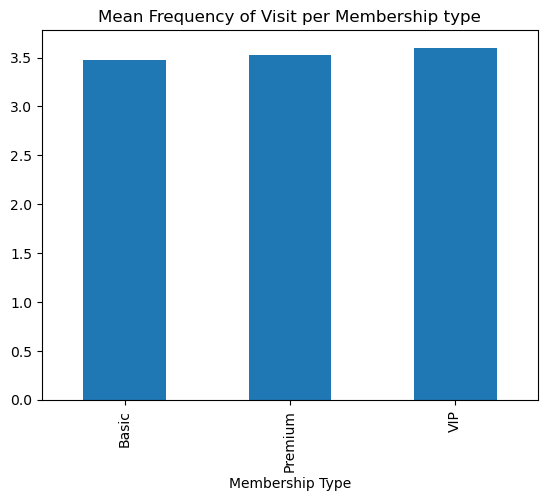

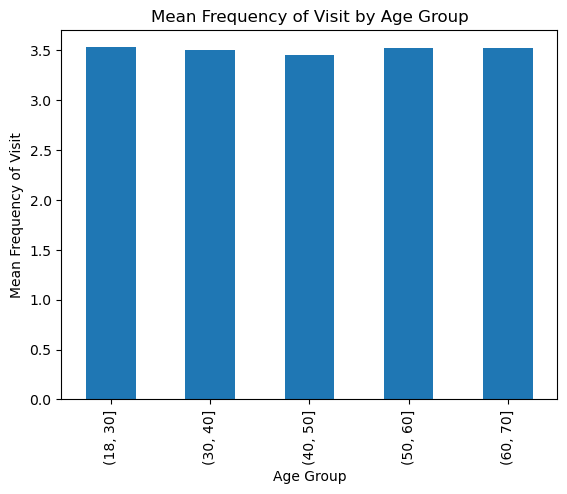

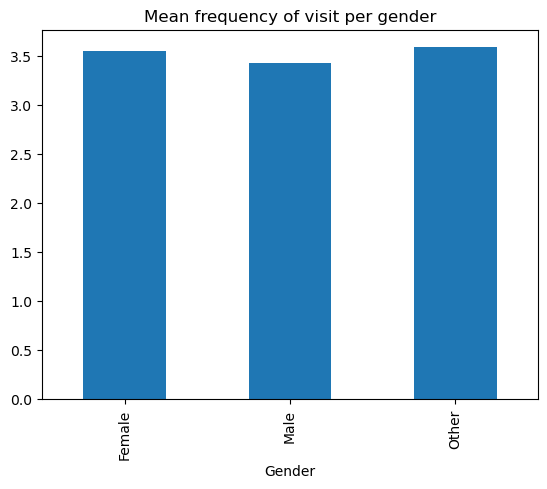

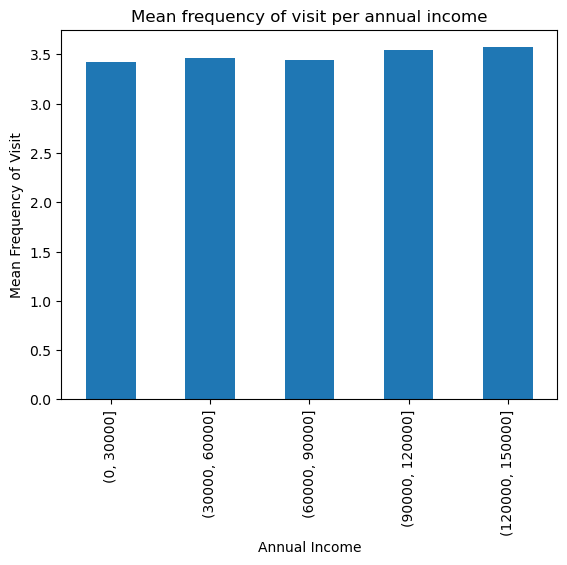

In [81]:
#Frequency of visit analysis by different groups

plt.hist(df["Frequency of Visit"], bins=20)
plt.title("Frequency of Visit")
plt.show()


df.groupby('Membership Type')['Frequency of Visit'].mean().plot(kind="bar")
plt.title("Mean Frequency of Visit per Membership type")
plt.show()

age_bins = pd.cut(df["Age"], bins=[18,30,40,50,60,70])
age_frequency = df.groupby(age_bins)["Frequency of Visit"].mean()
age_frequency.plot(kind="bar")
plt.title("Mean Frequency of Visit by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Frequency of Visit")
plt.show()


df.groupby("Gender")["Frequency of Visit"].mean().plot(kind="bar")
plt.title("Mean frequency of visit per gender")
plt.show()

income_bins = pd.cut(df["Annual Income"], bins=[0, 30000, 60000, 90000, 120000, 150000])
income_frequency = df.groupby(income_bins)["Frequency of Visit"].mean()
income_frequency.plot(kind="bar")
plt.title("Mean frequency of visit per annual income")
plt.xlabel("Annual Income")
plt.ylabel("Mean Frequency of Visit")
plt.show()
